In [1]:
import logging
from sklearn.ensemble import GradientBoostingRegressor 
from sellibrary.gbrt import GBRTWrapper
from sellibrary.text_file_loader import load_feature_matrix
from sellibrary.filter_only_golden import FilterGolden
from sellibrary.locations import FileLocations
from sellibrary.wiki.wikipedia_datasets import WikipediaDataset
from sellibrary.sel.dexter_dataset import DatasetDexter

from sklearn.ensemble import ExtraTreesRegressor


INTERMEDIATE_PATH = FileLocations.get_dropbox_intermediate_path()

In [2]:
# setup logging


handler = logging.StreamHandler()
handler.setFormatter(logging.Formatter('%(asctime)s %(name)-12s %(levelname)-8s %(message)s'))
logger = logging.getLogger(__name__)
logger.addHandler(handler)
logger.propagate = False
logger.setLevel(logging.INFO)

In [3]:
feature_names = [
    'v1_graph_size', 'v1_graph_diameter', 'v1_node_degree', 'v1_degree_mean_median_ratio',
    'v1_out_degree_mean_median_ratio', 'v1_degree_mean_median_ratio', 'v1_farness', 'v1_closeness', 'v1_centrality',
    'v1_minus_low_relatedness_graph_size', 'v1_minus_low_relatedness_graph_diameter',
    'v1_minus_low_relatedness_node_degree', 'v1_minus_low_relatedness_degree_mean_median_ratio',
    'v1_minus_low_relatedness_out_degree_mean_median_ratio', 'v1_minus_low_relatedness_degree_mean_median_ratio',
    'v1_minus_low_relatedness_farness', 'v1_minus_low_relatedness_closeness',
    'v1_minus_low_relatedness_centrality','v0_graph_size', 'v0_graph_diameter', 'v0_node_degree',
    'v0_degree_mean_median_ratio', 'v0_out_degree_mean_median_ratio', 'v0_degree_mean_median_ratio', 'v0_farness',
    'v0_closeness', 'v0_centrality', 'v0_minus_low_relatedness_graph_size',
    'v0_minus_low_relatedness_graph_diameter', 'v0_minus_low_relatedness_node_degree',
    'v0_minus_low_relatedness_degree_mean_median_ratio', 'v0_minus_low_relatedness_out_degree_mean_median_ratio',
    'v0_minus_low_relatedness_degree_mean_median_ratio', 'v0_minus_low_relatedness_farness',
    'v0_minus_low_relatedness_closeness', 'v0_minus_low_relatedness_centrality'
]

In [4]:
def train_model():


    X, y, docid_array, entity_id_array = load_feature_matrix(feature_filename=INTERMEDIATE_PATH + 'dexter_all_heavy_catted_8_7_2018.txt',
                                                             feature_names=feature_names,
                                                             entity_id_index=1,
                                                             y_feature_index=2, 
                                                             first_feature_index=4, 
                                                             number_features_per_line=40,
                                                             tmp_filename='/tmp/temp_conversion_file.txt'
                                                             )
    
    # train only on records we have a golden salience for
    fg = FilterGolden()
    logger.info('X Shape = %s',X.shape)
    logger.info('y Shape = %s',y.shape)
    
    dexter_dataset = DatasetDexter()
    wikipedia_dataset = WikipediaDataset()

    X2, y2, docid2, entityid2 = fg.get_only_golden_rows(X, y, docid_array, entity_id_array, dexter_dataset, wikipedia_dataset )

#     X2, y2, docid2, entityid2 = fg.get_only_golden_rows(X, y, docid_array, entity_id_array)

    
    
    wrapper = GBRTWrapper()
    gbrt = wrapper.train_model_no_split(X2, y2,  n_estimators=40)
    logger.info('trained')
    #gbrt.save_model()

    # from https://shankarmsy.github.io/stories/gbrt-sklearn.html
    #One of the benefits of growing trees is that we can understand how important each of the features are 
    print ("Feature Importances" )
    print (gbrt.feature_importances_) 
    print ()
    #Let's print the R-squared value for train/test. This explains how much of the variance in the data our model is 
    #able to decipher. 
    print ("R-squared for Train: %.2f" %gbrt.score(X2, y2) )
    #print ("R-squared for Test: %.2f" %gbrt.score(X_test, y_test) )
    #- See more at: https://shankarmsy.github.io/stories/gbrt-sklearn.html#sthash.JNZQbnph.dpuf
    return gbrt, X2, y2, docid2, entityid2
    


if __name__ == "__main__":
    gbrt, X, y, docid_array, entity_id_array = train_model()

2018-07-11 10:41:22,467 sellibrary.text_file_loader INFO     loading data from : /project/Dropbox/Datasets/intermediate/dexter_all_heavy_catted_8_7_2018.txt
2018-07-11 10:41:22,703 sellibrary.text_file_loader INFO     skipping line with 1 rather than 40 fields ""
2018-07-11 10:41:22,704 sellibrary.text_file_loader INFO     0 lines processed
2018-07-11 10:41:22,705 sellibrary.text_file_loader INFO     skipping line with 5 rather than 40 fields "docId, entity_id, golden_salience, estimated_salience, [heavy_features]"
2018-07-11 10:41:22,706 sellibrary.text_file_loader INFO     0 lines processed
2018-07-11 10:41:22,745 sellibrary.text_file_loader INFO     10000 lines processed
2018-07-11 10:41:22,784 sellibrary.text_file_loader INFO     20000 lines processed
2018-07-11 10:41:22,823 sellibrary.text_file_loader INFO     30000 lines processed
2018-07-11 10:41:22,860 sellibrary.text_file_loader INFO     40000 lines processed
2018-07-11 10:41:22,873 sellibrary.text_file_loader INFO     skippin

2018-07-11 10:41:53,814 sellibrary.gbrt INFO     GBC trees: <sklearn.tree._tree.Tree object at 0x7f79c29c83d8>
2018-07-11 10:41:53,815 sellibrary.gbrt INFO     GBC trees: <sklearn.tree._tree.Tree object at 0x7f79c29c8440>
2018-07-11 10:41:53,816 sellibrary.gbrt INFO     GBC trees: <sklearn.tree._tree.Tree object at 0x7f79c29c84a8>
2018-07-11 10:41:53,817 sellibrary.gbrt INFO     GBC trees: <sklearn.tree._tree.Tree object at 0x7f79c29c8510>
2018-07-11 10:41:53,818 sellibrary.gbrt INFO     GBC trees: <sklearn.tree._tree.Tree object at 0x7f79c29c8578>
2018-07-11 10:41:53,819 sellibrary.gbrt INFO     GBC trees: <sklearn.tree._tree.Tree object at 0x7f79c29c85e0>
2018-07-11 10:41:53,820 sellibrary.gbrt INFO     GBC trees: <sklearn.tree._tree.Tree object at 0x7f79c29c8648>
2018-07-11 10:41:53,821 sellibrary.gbrt INFO     GBC trees: <sklearn.tree._tree.Tree object at 0x7f79c29c86b0>
2018-07-11 10:41:53,822 sellibrary.gbrt INFO     GBC trees: <sklearn.tree._tree.Tree object at 0x7f79c29c8718>
2

Feature Importances
[0.04667504 0.00918752 0.16578683 0.00130651 0.00943778 0.03267548
 0.08152907 0.09877932 0.         0.1481458  0.01084344 0.0434201
 0.02195101 0.03752626 0.06071199 0.10682108 0.08896789 0.
 0.         0.         0.0012063  0.00810317 0.         0.
 0.         0.00285814 0.         0.         0.         0.
 0.         0.0014674  0.00612668 0.00578533 0.00133745 0.00935043]

R-squared for Train: 0.15


In [21]:
#All right let's do this the right way. We'll use a cross-validation generator to 
# select train and CV datasets to finetune parameters such as C 
# (Regularization parameter we saw earlier). These hyperparameters are extremely critical to 
# the model. 
#Now, if we tune parameters against the Test dataset, we will end up biasing towards the test 
# set and will once again not generalize very well. We will also have no good way to find out 
# since we have essentially trained on all our data. 
#Luckily scikit-learn has builit-in packages that can help with this. We'll use a crossvalidation 
# generator that can train the model by tuning the parameters based on a cross-validation subset 
# (cv) that is picked from within the training set. A different cv subset will be picked for each iteration, we control the number of iterations. Then we will 
#use these cv/train splits and run a gridsearch function that will evaluate the model with each split and tune parameters 
#to give us the best parameter that gives the optimal result.

#Defining this as a function so we can call it anytime we want



def GradientBooster(param_grid, n_jobs, X, y, estimator):
    
    #Choose cross-validation generator - let's choose ShuffleSplit which randomly shuffles and selects Train and CV sets 
    #for each iteration. There are other methods like the KFold split.
    cv = ShuffleSplit(X.shape[0], n_iter=10, test_size=0.2)
    #Apply the cross-validation iterator on the Training set using GridSearchCV. This will run the classifier on the 
    #different train/cv splits using parameters specified and return the model that has the best results 

    # 
    #Note that we are tuning based on the F1 score 2PR/P+R where P is Precision and R is Recall. This may not always be 
    #the best score to tune our model on.  For now, we'll use F1.
    classifier = GridSearchCV(estimator=estimator, cv=cv, param_grid=param_grid, n_jobs=n_jobs)
    #Also note that we're feeding multiple neighbors to the GridSearch to try out. 
    #We'll now fit the training dataset to this classifier
    classifier.fit(X, y)
    #Let's look at the best estimator that was found by GridSearchCV
    print ("Best Estimator learned through GridSearch")
    print ( classifier.best_estimator_)
    return cv, classifier.best_estimator_, classifier

In [22]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import cross_validation 
from sklearn.naive_bayes import GaussianNB 
from sklearn.datasets import load_digits 
from sklearn.learning_curve import learning_curve

In [23]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)): 
    
    """ Generate a simple plot of the test and traning learning curve. 
    Parameters ---------- 
    estimator : object type that implements the "fit" and "predict" methods An object of that type which is cloned for each validation. 
    title : string Title for the chart. 
    X : array-like, shape (n_samples, n_features) Training vector, where n_samples is the number of samples and n_features is the number of features. 
    y : array-like, shape (n_samples) or (n_samples, n_features), optional Target relative to X for classification or regression; None for unsupervised learning. 
    ylim : tuple, shape (ymin, ymax), optional Defines minimum and maximum yvalues plotted. 
    cv : integer, cross-validation generator, optional If an integer is passed, it is the number of folds (defaults to 3). Specific cross-validation objects can be passed, see sklearn.cross_validation module for the list of possible objects 
    n_jobs : integer, optional Number of jobs to run in parallel (default 1). """ 
    plt.figure()
    plt.title(title)
    if ylim is not None: plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    return plt

In [24]:
def print_info(best_est, X, y, tset):
    print ("--------------------------------" )
    print (tset+" Best Estimator Parameters" )
    print ("--------------------------------" )
    print ("n_estimators: %d" %best_est.n_estimators )
    print ("max_depth: %d" %best_est.max_depth )
    print ("min_samples_leaf: %d" %best_est.min_samples_leaf )
    print ("max_features: %.2f" %best_est.max_features )
    print (tset+" R-squared: %.2f" %best_est.score(X,y) )     
    print ("Learning Rate: %.2f" %best_est.learning_rate )

In [25]:
from sklearn.cross_validation import ShuffleSplit, train_test_split 
from sklearn.grid_search import GridSearchCV

In [26]:
# if no space left on device, try setting the env ver JOBLIB_TEMP_FOLDER to /tmp
%env JOBLIB_TEMP_FOLDER=/tmp
#WARNING - THIS MIGHT TAKE A WHILE TO RUN. 
# TRY ADJUSTING parameters such as n_jobs (jobs to run in parallel, before 
#increasing this make sure your system can handle it), n_iter for ShuffleSplit 
# (in the function definition) and reducing #number of values being tried for max_depth/n_estimators. 
#SELECT INTERRUPT IN THE MENU AND PRESS INTERRUPT KERNEL IF YOU NEEDD TO STOP EXECUTION 
logger.info('starting')

param_grid={'n_estimators':[25, 50, 250], # tried 250, 100, [50], 25
            'learning_rate': [0.05, 0.02],# tried 0.2, 0.1, [0.05], 0.02, 0.01],
            'max_depth':[9, 12], # tried 6,[9],12
            'min_samples_leaf':[18, 20, 22], # tried  2,5,9,12,15,[18]
            'max_features':[0.3,0.4] # tried 0.2,[0.3],0.4,0.5
           } 
n_jobs = 4 

wrapper = GBRTWrapper()
X_train, X_test, y_train, y_test = wrapper.get_test_train_datasets(X,y,entity_id_array,7,train_split=0.95)

#Let's fit GBRT to the digits training dataset by calling the function we just created. 
estimator = GradientBoostingRegressor()

cv, best_est, trained_model=GradientBooster(param_grid, n_jobs, X, y, estimator) 
logger.info('complete')
print_info(best_est, X, y, '.8CV')

2018-07-11 10:47:37,693 __main__     INFO     starting


env: JOBLIB_TEMP_FOLDER=/tmp


2018-07-11 10:48:32,458 __main__     INFO     complete


Best Estimator learned through GridSearch
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=12, max_features=0.4,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=18,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=25, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
--------------------------------
.8CV Best Estimator Parameters
--------------------------------
n_estimators: 25
max_depth: 12
min_samples_leaf: 18
max_features: 0.40
.8CV R-squared: 0.27
Learning Rate: 0.05


In [ ]:
# Try it for trees

# # if no space left on device, try setting the env ver JOBLIB_TEMP_FOLDER to /tmp
# %env JOBLIB_TEMP_FOLDER=/tmp
# logger.info('starting')
# param_grid={'n_estimators':[25, 50, 250], # tried 250, 100, [50], 25
#             'max_depth':[9, 12, 15, 20], # tried 6,[9],12
#             'min_samples_leaf':[20, 22, 25, 30], # tried  2,5,9,12,15,[18]
#             'max_features':[0.5,0.6,0.7] # tried 0.2,[0.3],0.4,0.5
#            } 
# n_jobs = 4 
# wrapper = GBRTWrapper()
# X_train, X_test, y_train, y_test = wrapper.get_test_train_datasets(X,y,entity_id_array,7,train_split=0.95)
# #Let's fit GBRT to the digits training dataset by calling the function we just created. 
# estimator = ExtraTreesRegressor()
# cv, best_est=GradientBooster(param_grid, n_jobs, X, y, estimator) 
# logger.info('complete')
# print_info(best_est, X, y, '.8CV')

In [28]:
print_info(best_est, X_train, y_train, 'Train')
print_info(best_est, X_test, y_test, 'Test')
print_info(best_est, X, y, 'All')

--------------------------------
Train Best Estimator Parameters
--------------------------------
n_estimators: 25
max_depth: 12
min_samples_leaf: 18
max_features: 0.40
Train R-squared: 0.27
Learning Rate: 0.05
--------------------------------
Test Best Estimator Parameters
--------------------------------
n_estimators: 25
max_depth: 12
min_samples_leaf: 18
max_features: 0.40
Test R-squared: 0.24
Learning Rate: 0.05
--------------------------------
All Best Estimator Parameters
--------------------------------
n_estimators: 25
max_depth: 12
min_samples_leaf: 18
max_features: 0.40
All R-squared: 0.27
Learning Rate: 0.05


Best Estimator Parameters (with all data with false zeros introduced)
---------------------------
n_estimators: 100
Learning Rate: 0.10
max_depth: 6
min_samples_leaf: 9
max_features: 0.30
Train R-squared: 0.64

2018-07-11 10:49:27,674 __main__     INFO     starting
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multipr

JoblibIndexError: JoblibIndexError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/opt/anaconda/envs/Python3/lib/python3.6/runpy.py in _run_module_as_main(mod_name='ipykernel.__main__', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel.__main__', loader=<_f...b/python3.6/site-packages/ipykernel/__main__.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
/opt/anaconda/envs/Python3/lib/python3.6/runpy.py in _run_code(code=<code object <module> at 0x7f7a8f2b26f0, file "/...3.6/site-packages/ipykernel/__main__.py", line 1>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__pycache__/__main__.cpython-36.pyc', '__doc__': None, '__file__': '/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': 'ipykernel', '__spec__': ModuleSpec(name='ipykernel.__main__', loader=<_f...b/python3.6/site-packages/ipykernel/__main__.py'), 'app': <module 'ipykernel.kernelapp' from '/opt/anacond.../python3.6/site-packages/ipykernel/kernelapp.py'>}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel.__main__', loader=<_f...b/python3.6/site-packages/ipykernel/__main__.py'), pkg_name='ipykernel', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x7f7a8f2b26f0, file "/...3.6/site-packages/ipykernel/__main__.py", line 1>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__pycache__/__main__.cpython-36.pyc', '__doc__': None, '__file__': '/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': 'ipykernel', '__spec__': ModuleSpec(name='ipykernel.__main__', loader=<_f...b/python3.6/site-packages/ipykernel/__main__.py'), 'app': <module 'ipykernel.kernelapp' from '/opt/anacond.../python3.6/site-packages/ipykernel/kernelapp.py'>}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py in <module>()
      1 if __name__ == '__main__':
      2     from ipykernel import kernelapp as app
----> 3     app.launch_new_instance()

...........................................................................
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    481         if self.poller is not None:
    482             self.poller.start()
    483         self.kernel.start()
    484         self.io_loop = ioloop.IOLoop.current()
    485         try:
--> 486             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    487         except KeyboardInterrupt:
    488             pass
    489 
    490 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/tornado/platform/asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    122         except (RuntimeError, AssertionError):
    123             old_loop = None
    124         try:
    125             self._setup_logging()
    126             asyncio.set_event_loop(self.asyncio_loop)
--> 127             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Uni...EventLoop running=True closed=False debug=False>>
    128         finally:
    129             asyncio.set_event_loop(old_loop)
    130 
    131     def stop(self):

...........................................................................
/opt/anaconda/envs/Python3/lib/python3.6/asyncio/base_events.py in run_forever(self=<_UnixSelectorEventLoop running=True closed=False debug=False>)
    417             sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    418                                    finalizer=self._asyncgen_finalizer_hook)
    419         try:
    420             events._set_running_loop(self)
    421             while True:
--> 422                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_UnixS...EventLoop running=True closed=False debug=False>>
    423                 if self._stopping:
    424                     break
    425         finally:
    426             self._stopping = False

...........................................................................
/opt/anaconda/envs/Python3/lib/python3.6/asyncio/base_events.py in _run_once(self=<_UnixSelectorEventLoop running=True closed=False debug=False>)
   1427                         logger.warning('Executing %s took %.3f seconds',
   1428                                        _format_handle(handle), dt)
   1429                 finally:
   1430                     self._current_handle = None
   1431             else:
-> 1432                 handle._run()
        handle._run = <bound method Handle._run of <Handle BaseAsyncIOLoop._handle_events(11, 1)>>
   1433         handle = None  # Needed to break cycles when an exception occurs.
   1434 
   1435     def _set_coroutine_wrapper(self, enabled):
   1436         try:

...........................................................................
/opt/anaconda/envs/Python3/lib/python3.6/asyncio/events.py in _run(self=<Handle BaseAsyncIOLoop._handle_events(11, 1)>)
    140             self._callback = None
    141             self._args = None
    142 
    143     def _run(self):
    144         try:
--> 145             self._callback(*self._args)
        self._callback = <bound method BaseAsyncIOLoop._handle_events of <tornado.platform.asyncio.AsyncIOMainLoop object>>
        self._args = (11, 1)
    146         except Exception as exc:
    147             cb = _format_callback_source(self._callback, self._args)
    148             msg = 'Exception in callback {}'.format(cb)
    149             context = {

...........................................................................
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/tornado/platform/asyncio.py in _handle_events(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, fd=11, events=1)
    112             self.writers.remove(fd)
    113         del self.handlers[fd]
    114 
    115     def _handle_events(self, fd, events):
    116         fileobj, handler_func = self.handlers[fd]
--> 117         handler_func(fileobj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fileobj = <zmq.sugar.socket.Socket object>
        events = 1
    118 
    119     def start(self):
    120         try:
    121             old_loop = asyncio.get_event_loop()

...........................................................................
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': "#OK we'll now call the plot_learning_curve modul...g rate even further to address any overfitting. \n", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 7, 11, 10, 49, 27, 669785, tzinfo=tzlocal()), 'msg_id': '1cfb2f6ff68f419e80b9c9c74ac650c8', 'msg_type': 'execute_request', 'session': '18d55d334c6240f98c2713286b64cdb2', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '1cfb2f6ff68f419e80b9c9c74ac650c8', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'18d55d334c6240f98c2713286b64cdb2']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': "#OK we'll now call the plot_learning_curve modul...g rate even further to address any overfitting. \n", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 7, 11, 10, 49, 27, 669785, tzinfo=tzlocal()), 'msg_id': '1cfb2f6ff68f419e80b9c9c74ac650c8', 'msg_type': 'execute_request', 'session': '18d55d334c6240f98c2713286b64cdb2', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '1cfb2f6ff68f419e80b9c9c74ac650c8', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'18d55d334c6240f98c2713286b64cdb2'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': "#OK we'll now call the plot_learning_curve modul...g rate even further to address any overfitting. \n", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 7, 11, 10, 49, 27, 669785, tzinfo=tzlocal()), 'msg_id': '1cfb2f6ff68f419e80b9c9c74ac650c8', 'msg_type': 'execute_request', 'session': '18d55d334c6240f98c2713286b64cdb2', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '1cfb2f6ff68f419e80b9c9c74ac650c8', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code="#OK we'll now call the plot_learning_curve modul...g rate even further to address any overfitting. \n", silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = "#OK we'll now call the plot_learning_curve modul...g rate even further to address any overfitting. \n"
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=("#OK we'll now call the plot_learning_curve modul...g rate even further to address any overfitting. \n",), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ("#OK we'll now call the plot_learning_curve modul...g rate even further to address any overfitting. \n",)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell="#OK we'll now call the plot_learning_curve modul...g rate even further to address any overfitting. \n", store_history=True, silent=False, shell_futures=True)
   2657         -------
   2658         result : :class:`ExecutionResult`
   2659         """
   2660         try:
   2661             result = self._run_cell(
-> 2662                 raw_cell, store_history, silent, shell_futures)
        raw_cell = "#OK we'll now call the plot_learning_curve modul...g rate even further to address any overfitting. \n"
        store_history = True
        silent = False
        shell_futures = True
   2663         finally:
   2664             self.events.trigger('post_execute')
   2665             if not silent:
   2666                 self.events.trigger('post_run_cell', result)

...........................................................................
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell="#OK we'll now call the plot_learning_curve modul...g rate even further to address any overfitting. \n", store_history=True, silent=False, shell_futures=True)
   2780                 self.displayhook.exec_result = result
   2781 
   2782                 # Execute the user code
   2783                 interactivity = 'none' if silent else self.ast_node_interactivity
   2784                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2785                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2786                 
   2787                 self.last_execution_succeeded = not has_raised
   2788                 self.last_execution_result = result
   2789 

...........................................................................
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Expr object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>], cell_name='<ipython-input-30-a2a084748d3a>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 7f7a52cdb240, executi...rue silent=False shell_futures=True> result=None>)
   2898 
   2899         try:
   2900             for i, node in enumerate(to_run_exec):
   2901                 mod = ast.Module([node])
   2902                 code = compiler(mod, cell_name, "exec")
-> 2903                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x7f7a51e98270, file "<ipython-input-30-a2a084748d3a>", line 14>
        result = <ExecutionResult object at 7f7a52cdb240, executi...rue silent=False shell_futures=True> result=None>
   2904                     return True
   2905 
   2906             for i, node in enumerate(to_run_interactive):
   2907                 mod = ast.Interactive([node])

...........................................................................
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x7f7a51e98270, file "<ipython-input-30-a2a084748d3a>", line 14>, result=<ExecutionResult object at 7f7a52cdb240, executi...rue silent=False shell_futures=True> result=None>)
   2958         outflag = True  # happens in more places, so it's easier as default
   2959         try:
   2960             try:
   2961                 self.hooks.pre_run_code_hook()
   2962                 #rprint('Running code', repr(code_obj)) # dbg
-> 2963                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x7f7a51e98270, file "<ipython-input-30-a2a084748d3a>", line 14>
        self.user_global_ns = {'DatasetDexter': <class 'sellibrary.sel.dexter_dataset.DatasetDexter'>, 'ExtraTreesRegressor': <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>, 'FileLocations': <class 'sellibrary.locations.FileLocations'>, 'FilterGolden': <class 'sellibrary.filter_only_golden.FilterGolden'>, 'GBRTWrapper': <class 'sellibrary.gbrt.GBRTWrapper'>, 'GaussianNB': <class 'sklearn.naive_bayes.GaussianNB'>, 'GradientBooster': <function GradientBooster>, 'GradientBoostingRegressor': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>, 'GridSearchCV': <class 'sklearn.grid_search.GridSearchCV'>, 'INTERMEDIATE_PATH': '/project/Dropbox/Datasets/intermediate/', ...}
        self.user_ns = {'DatasetDexter': <class 'sellibrary.sel.dexter_dataset.DatasetDexter'>, 'ExtraTreesRegressor': <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>, 'FileLocations': <class 'sellibrary.locations.FileLocations'>, 'FilterGolden': <class 'sellibrary.filter_only_golden.FilterGolden'>, 'GBRTWrapper': <class 'sellibrary.gbrt.GBRTWrapper'>, 'GaussianNB': <class 'sklearn.naive_bayes.GaussianNB'>, 'GradientBooster': <function GradientBooster>, 'GradientBoostingRegressor': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>, 'GridSearchCV': <class 'sklearn.grid_search.GridSearchCV'>, 'INTERMEDIATE_PATH': '/project/Dropbox/Datasets/intermediate/', ...}
   2964             finally:
   2965                 # Reset our crash handler in place
   2966                 sys.excepthook = old_excepthook
   2967         except SystemExit as e:

...........................................................................
/project/TX-Jupiter-Notebooks/UCL_COMPGB99/<ipython-input-30-a2a084748d3a> in <module>()
      9 gbr_estimator = GradientBoostingRegressor(n_estimators=best_est.n_estimators, 
     10                                       max_depth=best_est.max_depth, 
     11                                       learning_rate=best_est.learning_rate, 
     12                                       min_samples_leaf=best_est.min_samples_leaf, 
     13                                       max_features=best_est.max_features) 
---> 14 plot_learning_curve(trained_model, title, X, y, cv=cv, n_jobs=n_jobs) 
     15 
     16 plt.show() 
     17 logger.info('complete')
     18 

...........................................................................
/project/TX-Jupiter-Notebooks/UCL_COMPGB99/<ipython-input-23-843abeac6091> in plot_learning_curve(estimator=GridSearchCV(cv=ShuffleSplit(1940, n_iter=10, te...='2*n_jobs', refit=True, scoring=None, verbose=0), title='Learning Curves (Gradient Boosted Regression Trees)', X=array([[364.,   2., 243., ...,   0.,   0.,   0.]...      [877.,   2., 101., ...,   0.,   0.,   0.]]), y=array([3.  , 3.  , 2.  , ..., 1.25, 1.75, 1.25]), ylim=None, cv=ShuffleSplit(1940, n_iter=10, test_size=0.2, random_state=None), n_jobs=4, train_sizes=array([0.1  , 0.325, 0.55 , 0.775, 1.   ]))
     12     plt.figure()
     13     plt.title(title)
     14     if ylim is not None: plt.ylim(*ylim)
     15     plt.xlabel("Training examples")
     16     plt.ylabel("Score")
---> 17     train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
     18     train_scores_mean = np.mean(train_scores, axis=1)
     19     train_scores_std = np.std(train_scores, axis=1)
     20     test_scores_mean = np.mean(test_scores, axis=1)
     21     test_scores_std = np.std(test_scores, axis=1)

...........................................................................
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/learning_curve.py in learning_curve(estimator=GridSearchCV(cv=ShuffleSplit(1940, n_iter=10, te...='2*n_jobs', refit=True, scoring=None, verbose=0), X=array([[364.,   2., 243., ...,   0.,   0.,   0.]...      [877.,   2., 101., ...,   0.,   0.,   0.]]), y=array([3.  , 3.  , 2.  , ..., 1.25, 1.75, 1.25]), train_sizes=array([0.1  , 0.325, 0.55 , 0.775, 1.   ]), cv=[(array([ 755,  597, 1098, ...,  909,  190,  295]), array([ 458,  247, 1333, 1902, 1922, 1052,  680,...1078,  894, 1485, 1599,
        326, 1374,  963])), (array([1305, 1038,   12, ...,  199,  552,  414]), array([  86,  104, 1355,  977,  961, 1705, 1749,...1930,  513,  177, 1686,
        387,  746,  992])), (array([1861,  713,  212, ...,  224, 1028, 1781]), array([ 125,  540, 1935,  199,  375,   11,  980,...1247,  956, 1541, 1489,
        767,    5, 1246])), (array([1090, 1684,  882, ..., 1688, 1121, 1829]), array([1155,  947,  819,  125, 1621, 1740,  746,... 167, 1324, 1868,   97,
        897,  109, 1400])), (array([1884,  429,  785, ..., 1437,  231, 1915]), array([ 660,  963, 1116,    0,  652,  607, 1193,... 520,  152, 1611,  813,
        788, 1908, 1282])), (array([ 655,  292,  835, ..., 1481,  465,  437]), array([ 308, 1657,  746,   33, 1017, 1329, 1328,... 457,  276, 1656, 1936,
       1349,  217, 1798])), (array([ 304, 1432,   76, ..., 1345,  640,  705]), array([ 268,   22, 1214, 1436, 1128,  122,  180,...1512,  729, 1548, 1392,
        772, 1258, 1866])), (array([1778, 1342,   57, ..., 1508, 1618,   18]), array([ 280, 1519,  382, 1813, 1302,  801,  212,...1538, 1445, 1368,   21,
         96,  262,  825])), (array([1678, 1604,  201, ...,  813, 1411,  423]), array([1546,  386,  928, 1331,  200,  133,  322,...1671, 1284, 1237,  564,
        772, 1279, 1082])), (array([ 803, 1749, 1576, ..., 1342, 1819, 1438]), array([1456,  250,  307,  677, 1555, 1453,  299,...1081,  669,  604,  447,
        214, 1296, 1233]))], scoring=None, exploit_incremental_learning=False, n_jobs=4, pre_dispatch='all', verbose=0, error_score='raise')
    166     else:
    167         out = parallel(delayed(_fit_and_score)(
    168             clone(estimator), X, y, scorer, train[:n_train_samples], test,
    169             verbose, parameters=None, fit_params=None, return_train_score=True,
    170             error_score=error_score)
--> 171             for train, test in cv for n_train_samples in train_sizes_abs)
        cv = [(array([ 755,  597, 1098, ...,  909,  190,  295]), array([ 458,  247, 1333, 1902, 1922, 1052,  680,...1078,  894, 1485, 1599,
        326, 1374,  963])), (array([1305, 1038,   12, ...,  199,  552,  414]), array([  86,  104, 1355,  977,  961, 1705, 1749,...1930,  513,  177, 1686,
        387,  746,  992])), (array([1861,  713,  212, ...,  224, 1028, 1781]), array([ 125,  540, 1935,  199,  375,   11,  980,...1247,  956, 1541, 1489,
        767,    5, 1246])), (array([1090, 1684,  882, ..., 1688, 1121, 1829]), array([1155,  947,  819,  125, 1621, 1740,  746,... 167, 1324, 1868,   97,
        897,  109, 1400])), (array([1884,  429,  785, ..., 1437,  231, 1915]), array([ 660,  963, 1116,    0,  652,  607, 1193,... 520,  152, 1611,  813,
        788, 1908, 1282])), (array([ 655,  292,  835, ..., 1481,  465,  437]), array([ 308, 1657,  746,   33, 1017, 1329, 1328,... 457,  276, 1656, 1936,
       1349,  217, 1798])), (array([ 304, 1432,   76, ..., 1345,  640,  705]), array([ 268,   22, 1214, 1436, 1128,  122,  180,...1512,  729, 1548, 1392,
        772, 1258, 1866])), (array([1778, 1342,   57, ..., 1508, 1618,   18]), array([ 280, 1519,  382, 1813, 1302,  801,  212,...1538, 1445, 1368,   21,
         96,  262,  825])), (array([1678, 1604,  201, ...,  813, 1411,  423]), array([1546,  386,  928, 1331,  200,  133,  322,...1671, 1284, 1237,  564,
        772, 1279, 1082])), (array([ 803, 1749, 1576, ..., 1342, 1819, 1438]), array([1456,  250,  307,  677, 1555, 1453,  299,...1081,  669,  604,  447,
        214, 1296, 1233]))]
    172         out = np.array(out)[:, :2]
    173         n_cv_folds = out.shape[0] // n_unique_ticks
    174         out = out.reshape(n_cv_folds, n_unique_ticks, 2)
    175 

...........................................................................
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=4), iterable=<generator object learning_curve.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=4)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
IndexError                                         Wed Jul 11 10:49:27 2018
PID: 4811               Python 3.6.5: /opt/anaconda/envs/Python3/bin/python
...........................................................................
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (GridSearchCV(cv=ShuffleSplit(1940, n_iter=10, te...='2*n_jobs', refit=True, scoring=None, verbose=0), array([[364.,   2., 243., ...,   0.,   0.,   0.]...      [877.,   2., 101., ...,   0.,   0.,   0.]]), array([3.  , 3.  , 2.  , ..., 1.25, 1.75, 1.25]), <function _passthrough_scorer>, array([ 755,  597, 1098,  652,  698,   65, 1116,... 769,  724, 1210,   89,  413,  941,
        697]), array([ 458,  247, 1333, 1902, 1922, 1052,  680,...1078,  894, 1485, 1599,
        326, 1374,  963]), 0), {'error_score': 'raise', 'fit_params': None, 'parameters': None, 'return_train_score': True})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (GridSearchCV(cv=ShuffleSplit(1940, n_iter=10, te...='2*n_jobs', refit=True, scoring=None, verbose=0), array([[364.,   2., 243., ...,   0.,   0.,   0.]...      [877.,   2., 101., ...,   0.,   0.,   0.]]), array([3.  , 3.  , 2.  , ..., 1.25, 1.75, 1.25]), <function _passthrough_scorer>, array([ 755,  597, 1098,  652,  698,   65, 1116,... 769,  724, 1210,   89,  413,  941,
        697]), array([ 458,  247, 1333, 1902, 1922, 1052,  680,...1078,  894, 1485, 1599,
        326, 1374,  963]), 0)
        kwargs = {'error_score': 'raise', 'fit_params': None, 'parameters': None, 'return_train_score': True}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/cross_validation.py in _fit_and_score(estimator=GridSearchCV(cv=ShuffleSplit(1940, n_iter=10, te...='2*n_jobs', refit=True, scoring=None, verbose=0), X=array([[364.,   2., 243., ...,   0.,   0.,   0.]...      [877.,   2., 101., ...,   0.,   0.,   0.]]), y=array([3.  , 3.  , 2.  , ..., 1.25, 1.75, 1.25]), scorer=<function _passthrough_scorer>, train=array([ 755,  597, 1098,  652,  698,   65, 1116,... 769,  724, 1210,   89,  413,  941,
        697]), test=array([ 458,  247, 1333, 1902, 1922, 1052,  680,...1078,  894, 1485, 1599,
        326, 1374,  963]), verbose=0, parameters=None, fit_params={}, return_train_score=True, return_parameters=False, error_score='raise')
   1670 
   1671     try:
   1672         if y_train is None:
   1673             estimator.fit(X_train, **fit_params)
   1674         else:
-> 1675             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method GridSearchCV.fit of GridSearchCV(c...'2*n_jobs', refit=True, scoring=None, verbose=0)>
        X_train = array([[4.480e+02, 2.000e+00, 6.000e+01, ..., 0...., ..., 0.000e+00, 0.000e+00,
        0.000e+00]])
        y_train = array([2.33, 2.67, 1.  , 1.33, 2.67, 1.  , 2.  ,...1.33, 2.33, 2.75, 1.67, 1.25, 1.67,
       2.33])
        fit_params = {}
   1676 
   1677     except Exception as e:
   1678         if error_score == 'raise':
   1679             raise

...........................................................................
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/grid_search.py in fit(self=GridSearchCV(cv=ShuffleSplit(1940, n_iter=10, te...='2*n_jobs', refit=True, scoring=None, verbose=0), X=array([[4.480e+02, 2.000e+00, 6.000e+01, ..., 0...., ..., 0.000e+00, 0.000e+00,
        0.000e+00]]), y=array([2.33, 2.67, 1.  , 1.33, 2.67, 1.  , 2.  ,...1.33, 2.33, 2.75, 1.67, 1.25, 1.67,
       2.33]))
    833         y : array-like, shape = [n_samples] or [n_samples, n_output], optional
    834             Target relative to X for classification or regression;
    835             None for unsupervised learning.
    836 
    837         """
--> 838         return self._fit(X, y, ParameterGrid(self.param_grid))
        self._fit = <bound method BaseSearchCV._fit of GridSearchCV(...'2*n_jobs', refit=True, scoring=None, verbose=0)>
        X = array([[4.480e+02, 2.000e+00, 6.000e+01, ..., 0...., ..., 0.000e+00, 0.000e+00,
        0.000e+00]])
        y = array([2.33, 2.67, 1.  , 1.33, 2.67, 1.  , 2.  ,...1.33, 2.33, 2.75, 1.67, 1.25, 1.67,
       2.33])
        self.param_grid = {'learning_rate': [0.05, 0.02], 'max_depth': [9, 12], 'max_features': [0.3, 0.4], 'min_samples_leaf': [18, 20, 22], 'n_estimators': [25, 50, 250]}
    839 
    840 
    841 class RandomizedSearchCV(BaseSearchCV):
    842     """Randomized search on hyper parameters.

...........................................................................
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/grid_search.py in _fit(self=GridSearchCV(cv=ShuffleSplit(1940, n_iter=10, te...='2*n_jobs', refit=True, scoring=None, verbose=0), X=array([[4.480e+02, 2.000e+00, 6.000e+01, ..., 0...., ..., 0.000e+00, 0.000e+00,
        0.000e+00]]), y=array([2.33, 2.67, 1.  , 1.33, 2.67, 1.  , 2.  ,...1.33, 2.33, 2.75, 1.67, 1.25, 1.67,
       2.33]), parameter_iterable=<sklearn.grid_search.ParameterGrid object>)
    569         )(
    570             delayed(_fit_and_score)(clone(base_estimator), X, y, self.scorer_,
    571                                     train, test, self.verbose, parameters,
    572                                     self.fit_params, return_parameters=True,
    573                                     error_score=self.error_score)
--> 574                 for parameters in parameter_iterable
        parameters = undefined
        parameter_iterable = <sklearn.grid_search.ParameterGrid object>
    575                 for train, test in cv)
    576 
    577         # Out is a list of triplet: score, estimator, n_test_samples
    578         n_fits = len(out)

...........................................................................
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=4), iterable=<generator object BaseSearchCV._fit.<locals>.<genexpr>>)
    774         self.n_completed_tasks = 0
    775         try:
    776             # Only set self._iterating to True if at least a batch
    777             # was dispatched. In particular this covers the edge
    778             # case of Parallel used with an exhausted iterator.
--> 779             while self.dispatch_one_batch(iterator):
        self.dispatch_one_batch = <bound method Parallel.dispatch_one_batch of Parallel(n_jobs=4)>
        iterator = <generator object BaseSearchCV._fit.<locals>.<genexpr>>
    780                 self._iterating = True
    781             else:
    782                 self._iterating = False
    783 

...........................................................................
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in dispatch_one_batch(self=Parallel(n_jobs=4), iterator=<generator object BaseSearchCV._fit.<locals>.<genexpr>>)
    620             tasks = BatchedCalls(itertools.islice(iterator, batch_size))
    621             if len(tasks) == 0:
    622                 # No more tasks available in the iterator: tell caller to stop.
    623                 return False
    624             else:
--> 625                 self._dispatch(tasks)
        self._dispatch = <bound method Parallel._dispatch of Parallel(n_jobs=4)>
        tasks = <sklearn.externals.joblib.parallel.BatchedCalls object>
    626                 return True
    627 
    628     def _print(self, msg, msg_args):
    629         """Display the message on stout or stderr depending on verbosity"""

...........................................................................
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in _dispatch(self=Parallel(n_jobs=4), batch=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    583         self.n_dispatched_tasks += len(batch)
    584         self.n_dispatched_batches += 1
    585 
    586         dispatch_timestamp = time.time()
    587         cb = BatchCompletionCallBack(dispatch_timestamp, len(batch), self)
--> 588         job = self._backend.apply_async(batch, callback=cb)
        job = undefined
        self._backend.apply_async = <bound method SequentialBackend.apply_async of <...lib._parallel_backends.SequentialBackend object>>
        batch = <sklearn.externals.joblib.parallel.BatchedCalls object>
        cb = <sklearn.externals.joblib.parallel.BatchCompletionCallBack object>
    589         self._jobs.append(job)
    590 
    591     def dispatch_next(self):
    592         """Dispatch more data for parallel processing

...........................................................................
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/externals/joblib/_parallel_backends.py in apply_async(self=<sklearn.externals.joblib._parallel_backends.SequentialBackend object>, func=<sklearn.externals.joblib.parallel.BatchedCalls object>, callback=<sklearn.externals.joblib.parallel.BatchCompletionCallBack object>)
    106             raise ValueError('n_jobs == 0 in Parallel has no meaning')
    107         return 1
    108 
    109     def apply_async(self, func, callback=None):
    110         """Schedule a func to be run"""
--> 111         result = ImmediateResult(func)
        result = undefined
        func = <sklearn.externals.joblib.parallel.BatchedCalls object>
    112         if callback:
    113             callback(result)
    114         return result
    115 

...........................................................................
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/externals/joblib/_parallel_backends.py in __init__(self=<sklearn.externals.joblib._parallel_backends.ImmediateResult object>, batch=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    327 
    328 class ImmediateResult(object):
    329     def __init__(self, batch):
    330         # Don't delay the application, to avoid keeping the input
    331         # arguments in memory
--> 332         self.results = batch()
        self.results = undefined
        batch = <sklearn.externals.joblib.parallel.BatchedCalls object>
    333 
    334     def get(self):
    335         return self.results
    336 

...........................................................................
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (GradientBoostingRegressor(alpha=0.9, criterion='...      subsample=1.0, verbose=0, warm_start=False), array([[4.480e+02, 2.000e+00, 6.000e+01, ..., 0...., ..., 0.000e+00, 0.000e+00,
        0.000e+00]]), array([2.33, 2.67, 1.  , 1.33, 2.67, 1.  , 2.  ,...1.33, 2.33, 2.75, 1.67, 1.25, 1.67,
       2.33]), <function _passthrough_scorer>, array([ 134, 1492,  891, ..., 1777,  323, 1307]), array([1054,  714, 1056,  342, 1085,  782,   17,... 774, 1539, 1057,  282,
       1494, 1031,  525]), 0, {'learning_rate': 0.05, 'max_depth': 9, 'max_features': 0.3, 'min_samples_leaf': 18, 'n_estimators': 25}, {}), {'error_score': 'raise', 'return_parameters': True})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (GradientBoostingRegressor(alpha=0.9, criterion='...      subsample=1.0, verbose=0, warm_start=False), array([[4.480e+02, 2.000e+00, 6.000e+01, ..., 0...., ..., 0.000e+00, 0.000e+00,
        0.000e+00]]), array([2.33, 2.67, 1.  , 1.33, 2.67, 1.  , 2.  ,...1.33, 2.33, 2.75, 1.67, 1.25, 1.67,
       2.33]), <function _passthrough_scorer>, array([ 134, 1492,  891, ..., 1777,  323, 1307]), array([1054,  714, 1056,  342, 1085,  782,   17,... 774, 1539, 1057,  282,
       1494, 1031,  525]), 0, {'learning_rate': 0.05, 'max_depth': 9, 'max_features': 0.3, 'min_samples_leaf': 18, 'n_estimators': 25}, {})
        kwargs = {'error_score': 'raise', 'return_parameters': True}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/cross_validation.py in _fit_and_score(estimator=GradientBoostingRegressor(alpha=0.9, criterion='...      subsample=1.0, verbose=0, warm_start=False), X=array([[4.480e+02, 2.000e+00, 6.000e+01, ..., 0...., ..., 0.000e+00, 0.000e+00,
        0.000e+00]]), y=array([2.33, 2.67, 1.  , 1.33, 2.67, 1.  , 2.  ,...1.33, 2.33, 2.75, 1.67, 1.25, 1.67,
       2.33]), scorer=<function _passthrough_scorer>, train=array([ 134, 1492,  891, ..., 1777,  323, 1307]), test=array([1054,  714, 1056,  342, 1085,  782,   17,... 774, 1539, 1057,  282,
       1494, 1031,  525]), verbose=0, parameters={'learning_rate': 0.05, 'max_depth': 9, 'max_features': 0.3, 'min_samples_leaf': 18, 'n_estimators': 25}, fit_params={}, return_train_score=False, return_parameters=True, error_score='raise')
   1663     if parameters is not None:
   1664         estimator.set_params(**parameters)
   1665 
   1666     start_time = time.time()
   1667 
-> 1668     X_train, y_train = _safe_split(estimator, X, y, train)
        X_train = undefined
        y_train = undefined
        estimator = GradientBoostingRegressor(alpha=0.9, criterion='...      subsample=1.0, verbose=0, warm_start=False)
        X = array([[4.480e+02, 2.000e+00, 6.000e+01, ..., 0...., ..., 0.000e+00, 0.000e+00,
        0.000e+00]])
        y = array([2.33, 2.67, 1.  , 1.33, 2.67, 1.  , 2.  ,...1.33, 2.33, 2.75, 1.67, 1.25, 1.67,
       2.33])
        train = array([ 134, 1492,  891, ..., 1777,  323, 1307])
   1669     X_test, y_test = _safe_split(estimator, X, y, test, train)
   1670 
   1671     try:
   1672         if y_train is None:

...........................................................................
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/cross_validation.py in _safe_split(estimator=GradientBoostingRegressor(alpha=0.9, criterion='...      subsample=1.0, verbose=0, warm_start=False), X=array([[4.480e+02, 2.000e+00, 6.000e+01, ..., 0...., ..., 0.000e+00, 0.000e+00,
        0.000e+00]]), y=array([2.33, 2.67, 1.  , 1.33, 2.67, 1.  , 2.  ,...1.33, 2.33, 2.75, 1.67, 1.25, 1.67,
       2.33]), indices=array([ 134, 1492,  891, ..., 1777,  323, 1307]), train_indices=None)
   1731             if train_indices is None:
   1732                 X_subset = X[np.ix_(indices, indices)]
   1733             else:
   1734                 X_subset = X[np.ix_(indices, train_indices)]
   1735         else:
-> 1736             X_subset = safe_indexing(X, indices)
        X_subset = undefined
        X = array([[4.480e+02, 2.000e+00, 6.000e+01, ..., 0...., ..., 0.000e+00, 0.000e+00,
        0.000e+00]])
        indices = array([ 134, 1492,  891, ..., 1777,  323, 1307])
   1737 
   1738     if y is not None:
   1739         y_subset = safe_indexing(y, indices)
   1740     else:

...........................................................................
/opt/anaconda/envs/Python3/lib/python3.6/site-packages/sklearn/utils/__init__.py in safe_indexing(X=array([[4.480e+02, 2.000e+00, 6.000e+01, ..., 0...., ..., 0.000e+00, 0.000e+00,
        0.000e+00]]), indices=array([ 134, 1492,  891, ..., 1777,  323, 1307]))
    155             return X.copy().iloc[indices]
    156     elif hasattr(X, "shape"):
    157         if hasattr(X, 'take') and (hasattr(indices, 'dtype') and
    158                                    indices.dtype.kind == 'i'):
    159             # This is often substantially faster than X[indices]
--> 160             return X.take(indices, axis=0)
        X.take = <built-in method take of numpy.ndarray object>
        indices = array([ 134, 1492,  891, ..., 1777,  323, 1307])
    161         else:
    162             return X[indices]
    163     else:
    164         return [X[idx] for idx in indices]

IndexError: index 1492 is out of bounds for size 155
___________________________________________________________________________

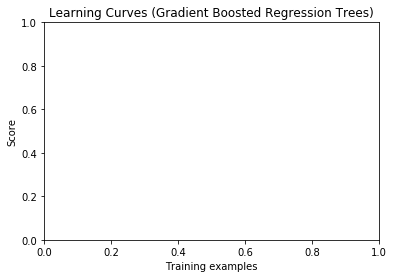

In [30]:
#OK we'll now call the plot_learning_curve module by feeding it the estimator (best estimator returned from GS) 
#and train/cv sets. 
#The module simply runs the estimator multiple times on subsets of the data provided and plots the train and cv scores. 
#Note that we're feeding the best parameters we've learned from GridSearchCV to the estimator now. 
#We may need to adjust the hyperparameters further if there is overfitting (or underfitting, though unlikely) 

logger.info('starting')
title = "Learning Curves (Gradient Boosted Regression Trees)" 
gbr_estimator = GradientBoostingRegressor(n_estimators=best_est.n_estimators, 
                                      max_depth=best_est.max_depth, 
                                      learning_rate=best_est.learning_rate, 
                                      min_samples_leaf=best_est.min_samples_leaf, 
                                      max_features=best_est.max_features) 
plot_learning_curve(gbr_estimator, title, X, y, cv=cv, n_jobs=n_jobs) 

plt.show() 
logger.info('complete')

#Looks like we've done a reasonable job getting about ~0.85 R-squared on the cv set and looks 
# from the learning curve that we may be able to do a bit better with more estimators. 
# Although we may need to reduce the learning rate even further to address any overfitting.

In [14]:
X.shape

(1940, 36)

In [15]:
X_train.shape

(1836, 36)

# Save the model

In [38]:
a = np.ones([1,36])
gbr_estimator.fit(X,y)
gbr_estimator.predict(a)

# l = [1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6]
# gbr_estimator.predict(np.array(l).reshape(1,-1))

array([1.74768437])

In [39]:
import pickle
from sellibrary.locations import FileLocations
INTERMEDIATE_PATH = FileLocations.get_dropbox_intermediate_path()

output_filename = INTERMEDIATE_PATH+'heavy_GradientBoostingRegressor.pickle'
with open(output_filename, 'wb') as handle:
    pickle.dump(gbr_estimator, handle, protocol=pickle.HIGHEST_PROTOCOL)